## Data and library import

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
data = pd.read_csv('Position_Salaries.csv')
feature = data.iloc[:,1:-1].to_numpy()
label = data.iloc[:,-1].to_numpy()
feature

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [186]:
label = label.reshape((len(label),1))
label

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [187]:
from sklearn.preprocessing import StandardScaler

normalize_x = StandardScaler(with_mean=True)
normalize_y = StandardScaler(with_mean=True)
feature = normalize_x.fit_transform(feature)
label = normalize_y.fit_transform(label)
feature

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [188]:
from sklearn.svm import SVR

model = SVR(kernel='poly')
model.fit(feature,label.reshape(len(label)))

SVR(kernel='poly')

In [189]:
predict_label = normalize_y.inverse_transform(model.predict(normalize_x.transform([[6.5],[8.5]])).reshape(1,-1))
predict_label.shape

(1, 2)

In [190]:
feature

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

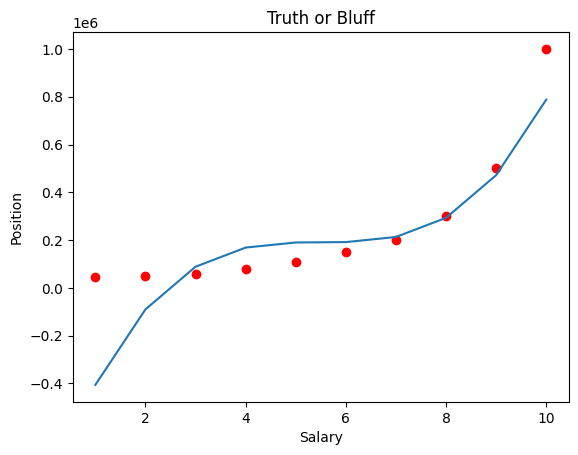

In [191]:
plt.scatter(
    y=normalize_y.inverse_transform(label),
    x=normalize_x.inverse_transform(feature),
    color='red'
)
predict_label = normalize_y.inverse_transform(model.predict(feature).reshape(1,-1))
plt.plot(
    normalize_x.inverse_transform(feature),
    predict_label.reshape(np.flip(predict_label.shape)),    
)
plt.title('Truth or Bluff')
plt.xlabel('Salary')
plt.ylabel('Position')
plt.show()

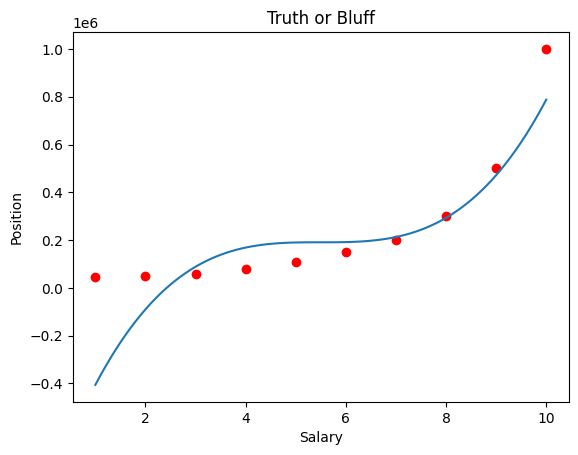

In [192]:
x_grid = np.arange(min(normalize_x.inverse_transform(feature)),max(normalize_x.inverse_transform(feature))+0.1,0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(
    x=normalize_x.inverse_transform(feature),
    y=normalize_y.inverse_transform(label),
    color='red'
)
predict_label = normalize_y.inverse_transform(model.predict(normalize_x.transform(x_grid)).reshape(1,-1))
plt.plot(
    x_grid,
    predict_label.reshape(np.flip(predict_label.shape))
)
plt.title('Truth or Bluff')
plt.xlabel('Salary')
plt.ylabel('Position')
plt.show()